# Accentuating Lane Lines

## Importing Packages

In [43]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import glob
import cv2

%matplotlib inline

# Make the plotImages function available
%run PlottingHelperFunctions.ipynb

## Testing Color Transforms

Testing Color Transforms...


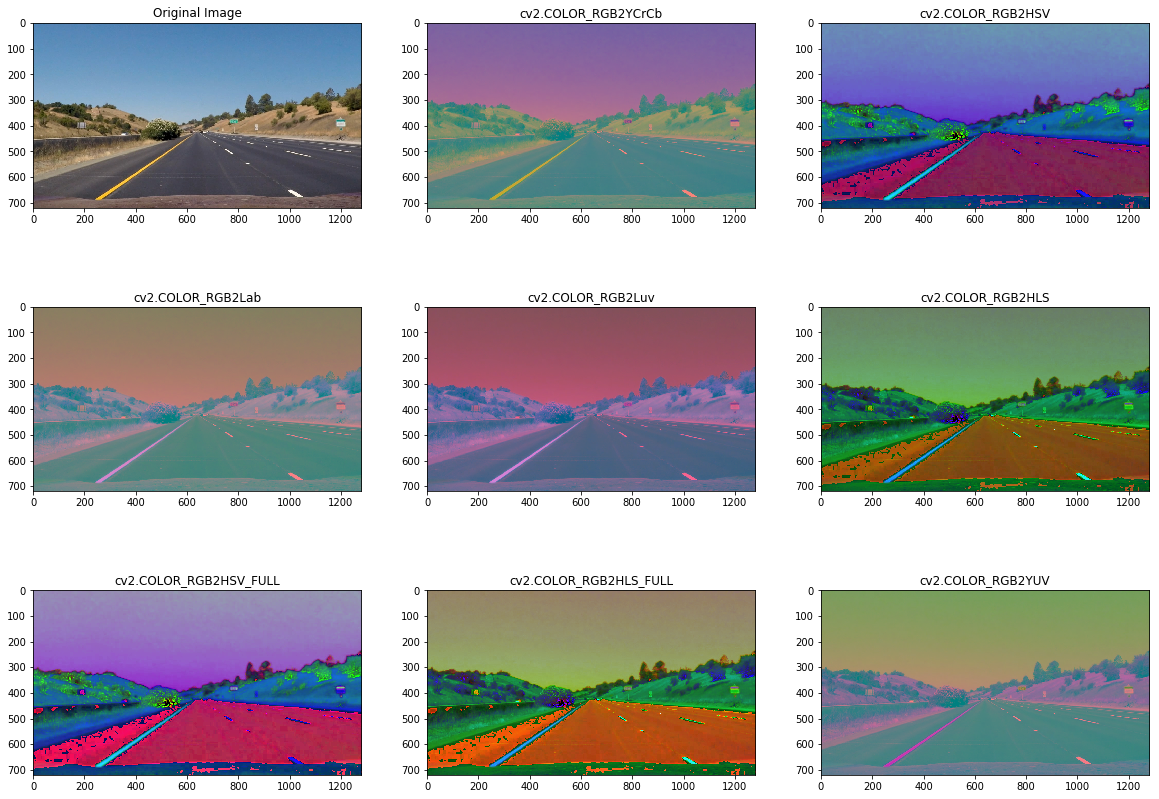

In [44]:
testImage = mpimg.imread("test_images/straight_lines1.jpg")

testColorConversions = [testImage,
                        cv2.cvtColor(testImage, cv2.COLOR_RGB2YCrCb   ),
                        cv2.cvtColor(testImage, cv2.COLOR_RGB2HSV     ),
                        cv2.cvtColor(testImage, cv2.COLOR_RGB2Lab     ),
                        cv2.cvtColor(testImage, cv2.COLOR_RGB2Luv     ),
                        cv2.cvtColor(testImage, cv2.COLOR_RGB2HLS     ),
                        cv2.cvtColor(testImage, cv2.COLOR_RGB2HSV_FULL),
                        cv2.cvtColor(testImage, cv2.COLOR_RGB2HLS_FULL),
                        cv2.cvtColor(testImage, cv2.COLOR_RGB2YUV     )]

testColorConversionNames= ["Original Image",
                        "cv2.COLOR_RGB2YCrCb"   ,            
                        "cv2.COLOR_RGB2HSV"     ,    
                        "cv2.COLOR_RGB2Lab"     ,    
                        "cv2.COLOR_RGB2Luv"     ,    
                        "cv2.COLOR_RGB2HLS"     ,  
                        "cv2.COLOR_RGB2HSV_FULL",       
                        "cv2.COLOR_RGB2HLS_FULL",       
                        "cv2.COLOR_RGB2YUV"     ]

print("Testing Color Transforms...")
plotImages(testColorConversions, testColorConversionNames, 3, figsize=(20, 20))

## Applying Sobel Gradient

In [45]:
def sobelGradientBinary(img):
    # TODO: pass in parameters for threshes
    return img

## Applying White and Yellow Accentuation

In [46]:
def whiteAndYellow(img):
    # convert to hls
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS_FULL)
    # white mask
    whiteMask = cv2.inRange(hls, (0, 210, 200), (255, 255, 255))
    # yellow mask
    yellowMask = cv2.inRange(hls, (10, 0, 100), (40, 255, 255))
    # combine white and yellow masks
    mask = cv2.bitwise_or(whiteMask, yellowMask)
    return cv2.bitwise_and(img, img, mask=mask)

def whiteAndYellowBinary(img, channel=1):
    return whiteAndYellow(img)[:,:,channel]

## Testing White and Yellow Accentuation

Testing HLS White and Yellow Mask...


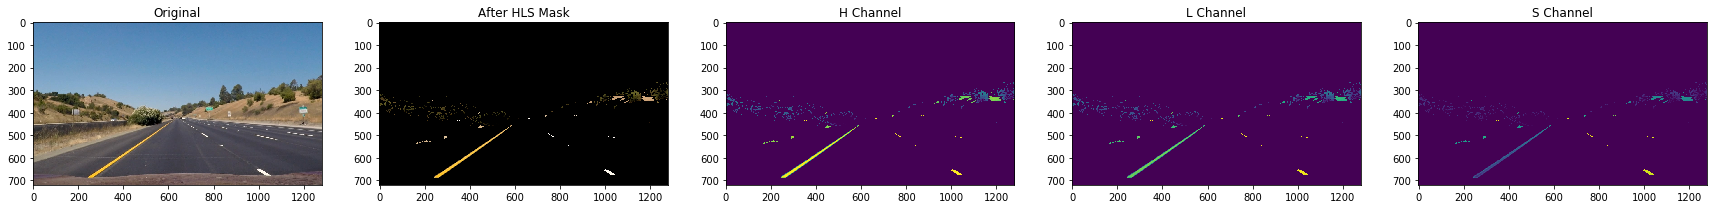

In [47]:
ywImg =  whiteAndYellow(testImage)
ywH = ywImg[:,:,0] 
ywL = ywImg[:,:,1] 
ywS = ywImg[:,:,2] 

print("Testing HLS White and Yellow Mask...")
plotImages([ywImg, ywH, ywL, ywS], 
           ["After HLS Mask", "H Channel", "L Channel", "S Channel"], 
           2, figsize=(30,40))

## Combining Color Transform, Gradient, and W&Y Accentuation

In [48]:
def accentuateLaneLines(img):
    sobelGradientBinaryImage = sobelGradientBinary(img)
    whiteAndYellowBinaryImage = whiteAndYellowBinary(img)
    
    # TODO: combine these images together for the final result
    combinedBinary = whiteAndYellowBinaryImage
    
    return combinedBinary

## Testing Accentuation Function